In [1]:
#! pip3 install opencv-python

In [2]:
import cv2
import os
import numpy as np
import pandas as pd

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Abstract

This project revolves around image classification using various types of lung X-ray images: those infected with viruses, those infected with Covid-19, and uninfected X-ray images. To begin, we will employ the CLAHE method (Contrast Limited Adaptive Histogram Equalization) to enhance the image contrast and brightness. Additionally, we will resize the images to ensure consistent image sizes throughout the dataset.

Moving forward, we will develop an image classification model using the powerful CNN (Convolutional Neural Network) architecture and Depthwise Separable CNNs, leveraging the capabilities of the tensorflow.keras package.

Lastly, we will explore an alternative approach by implementing the CNN algorithm using numpy, allowing us to compare its performance against the results obtained using the tensorflow.keras package.

## Introduction



Due to the Covid-19 pandemic, the lung is directly affected and prone to infection. However, it's important to note that the virus can also infect the lungs, leading to potential misdiagnosis based on X-ray images. In order to assist doctors in accurately diagnosing cases, it becomes crucial to perform image classification to differentiate between X-ray images of virus-infected lungs and those infected with Covid-19. To achieve this, we have obtained a dataset from Kaggle, comprising three distinct files containing uninfected lung X-ray images, virus-infected lung X-ray images, and Covid-infected lung images. To fulfill our objective, we will develop an image classification system utilizing CNN (Convolutional Neural Networks) and Depthwise Separable CNNs, leveraging the available datasets.

In [4]:
# data preprocessing
normal_path="/Users/yujiang/Desktop/COVID_IEEE/normal"
normal_adj="/Users/yujiang/Desktop/208data/adj_normal"
virus_path="/Users/yujiang/Desktop/COVID_IEEE/virus"
virus_adj="/Users/yujiang/Desktop/208data/adj_virus"
covid_path="/Users/yujiang/Desktop/COVID_IEEE/covid"
covid_adj="/Users/yujiang/Desktop/208data/adj_covid"
pathes=[normal_path,virus_path,covid_path]
adj_pathes=[normal_adj,virus_adj,covid_adj]
Label=[0,1,2]
denote=[]
data=[]
i=1
for path,adj_path,label in zip(pathes,adj_pathes,Label):
    for image_name in os.listdir(path):
        image_path = os.path.join(path, image_name)
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        
        # Enhance contrast
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        enhanced_image = clahe.apply(image)
        

        # Adjust brightness
        alpha = 1.2  # Brightness factor (1.0 is neutral)
        adjusted_image = np.clip(alpha * enhanced_image, 0, 255).astype(np.uint8)
        resized_image = cv2.resize(adjusted_image,(180,180))

        # # Save the enhanced image
        new_image_path= os.path.join(adj_path, f"normal_{i}.jpeg")
        cv2.imwrite(new_image_path, resized_image)
        denote.append(label)
        data.append(resized_image)
        i+=1


In [5]:
Info=pd.DataFrame({"image name":[],"max height":[],"min heght":[],"max width":[],"min width":[],"number of images":[]})
def info_image_set(path,i,image_set):
    height=[]
    width=[]
    sample_image=[]
    for image_name in os.listdir(path):
        image_path=os.path.join(path,image_name)
        image=cv2.imread(image_path)
        height.append(image.shape[0])
        width.append(image.shape[1]) 
    Info.loc[i,:]=[image_set,max(height),min(height),max(width),min(width),len(os.listdir(path))]
    



In [6]:
info_image_set(normal_path,0,"normal")
info_image_set(virus_path,1,"virus")
info_image_set(covid_path,2,"covid")
Info

,image name,max height,min heght,max width,min width,number of images
0,normal,2628.0,650.0,2890.0,1040.0,668.0
1,virus,2304.0,127.0,2273.0,384.0,619.0
2,covid,4095.0,237.0,4280.0,240.0,536.0


In [7]:
# READ DATA : need to change the file path
normal_adj="/Users/yujiang/Desktop/208data/adj_normal"
virus_adj="/Users/yujiang/Desktop/208data/adj_virus"
covid_adj="/Users/yujiang/Desktop/208data/adj_covid"
adj_pathes=[normal_adj,virus_adj,covid_adj]
image_data=[]
Label=[0,1,2]
denote=[]

for path,lable in zip(adj_pathes,Label):
    for image_name in os.listdir(path):
        image_path=os.path.join(path,image_name)
        image=cv2.imread(image_path)
        image_data.append(image)
        denote.append(label)


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [9]:
#visualization

def visual(image_name,path):
    sample_images = random.sample(os.listdir(path), 6)
    fig, axs = plt.subplots(2, 3, figsize=(15, 9))
    fig.suptitle(f'{image_name} Chest X-Ray', fontsize=20)

    for i, image_name in enumerate(sample_images):
        image_path = os.path.join(path, image_name)
        image = cv2.imread(image_path)
        axs[i//3, i%3].imshow(image)
        axs[i//3, i%3].axis('off')

    plt.show()

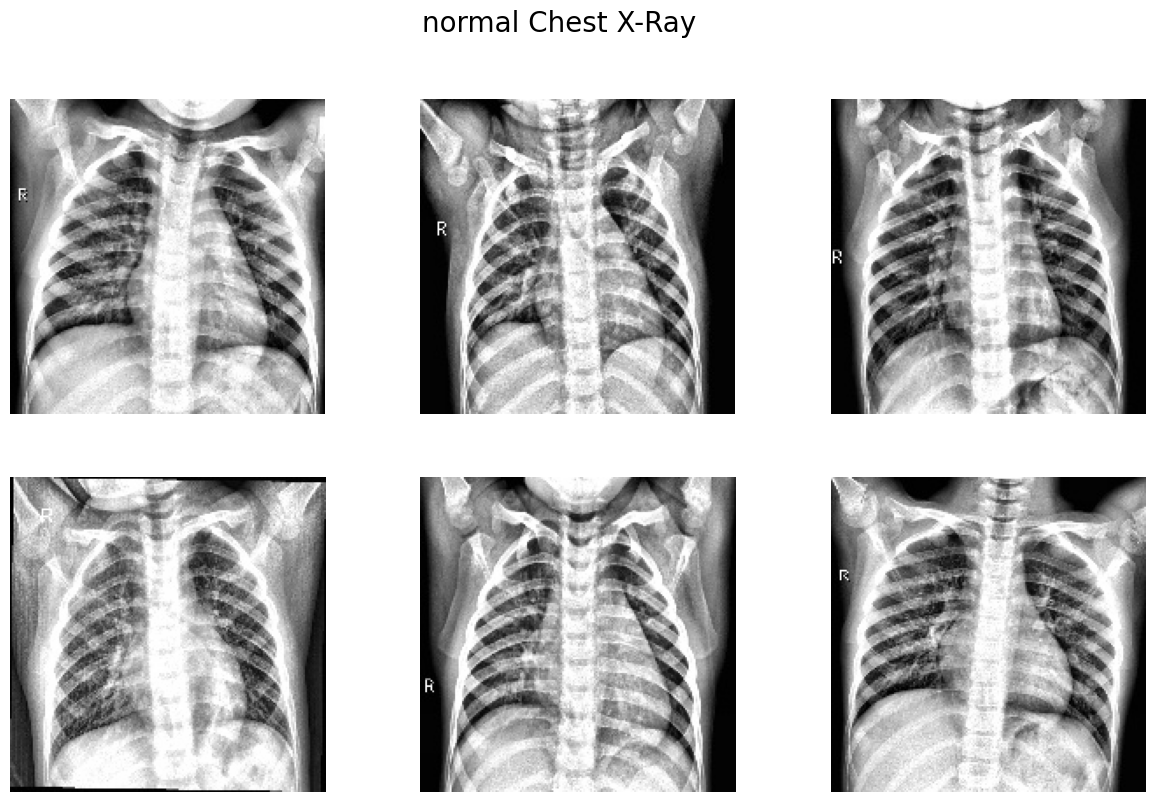

In [10]:
visual("normal",normal_adj)

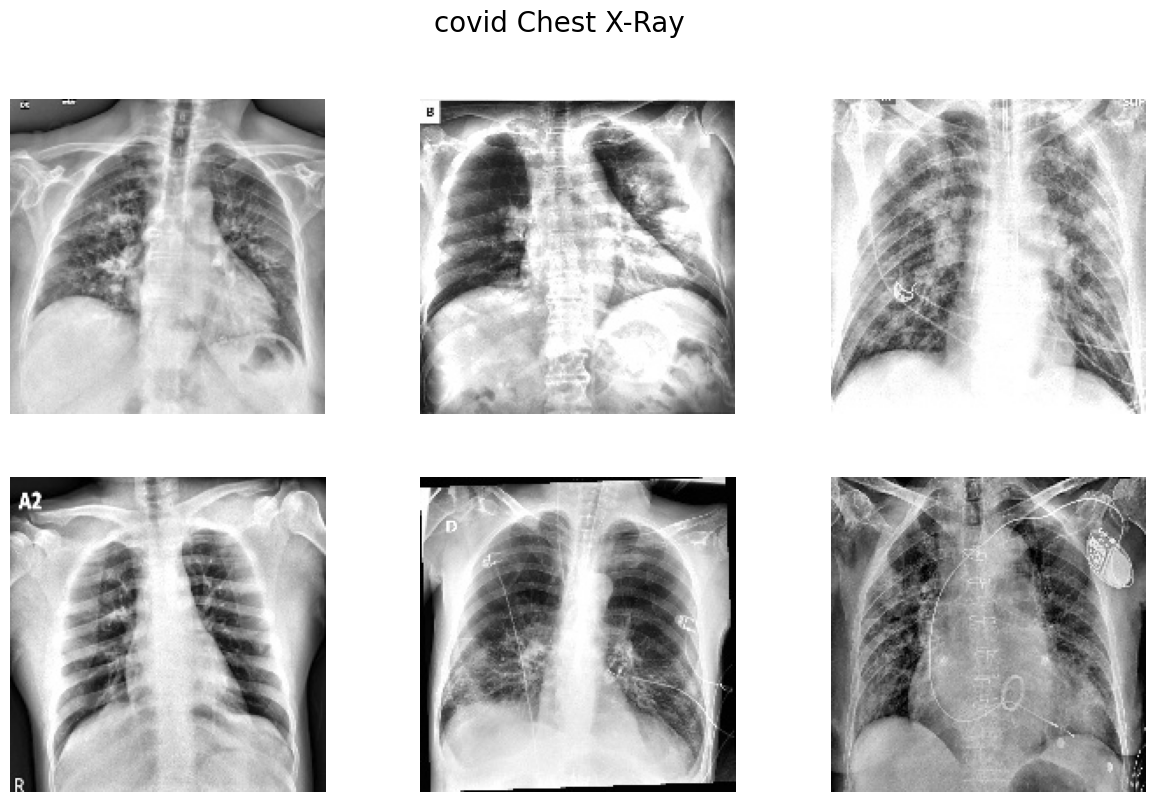

In [11]:
visual("covid",covid_adj)

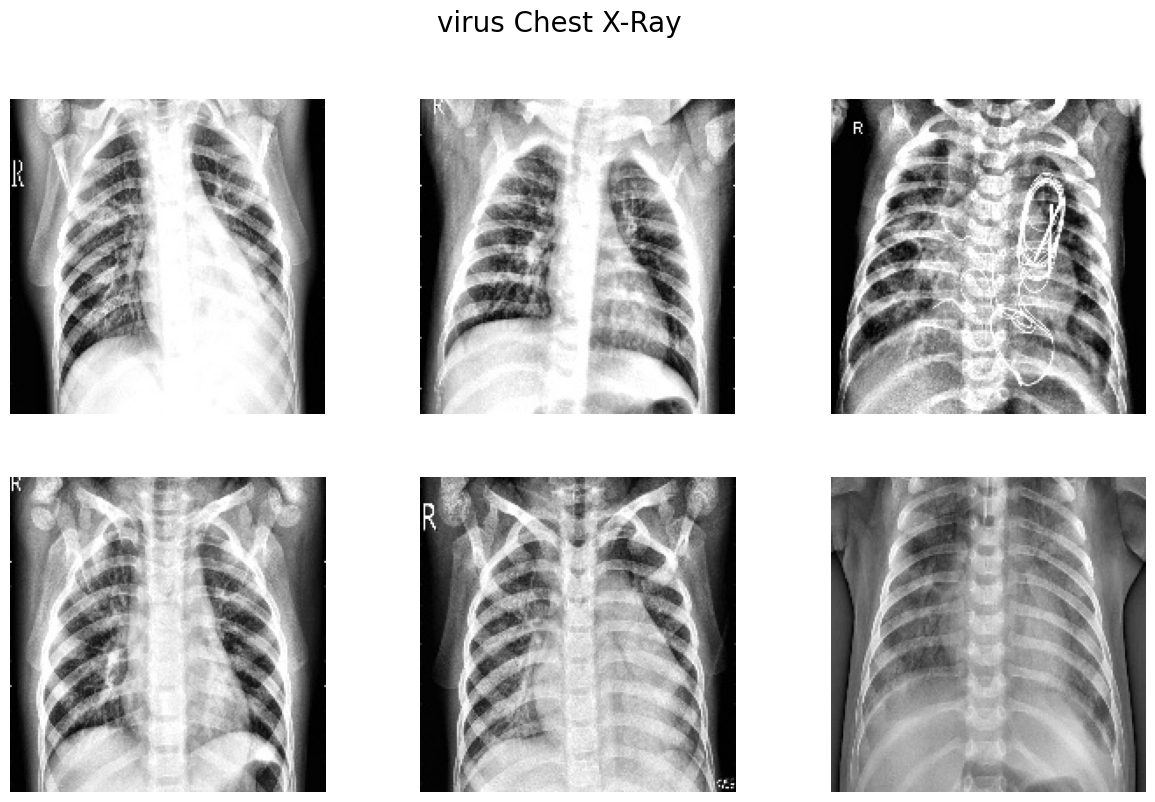

In [12]:
visual("virus",virus_adj)

In [13]:
#normalize data
image_data_n=np.array(image_data)/255

In [14]:
x_remain,x_test,y_remain,y_test=train_test_split(image_data_n,denote,test_size=0.3)
x_cv,x_train,y_cv,y_train=train_test_split(x_remain,y_remain,test_size=0.9)

In [15]:
import matplotlib.pyplot as plt
def CNN(x_train,x_test,y_train,y_test,x_cv,y_cv,opt):

    x_train=np.asarray(x_train)
    x_test=np.asarray(x_test)
    y_train=np.asarray(y_train)
    y_test=np.asarray(y_test)
    x_cv=np.asarray(x_cv)
    y_cv=np.asarray(y_cv)
    
    #convlution & maxpool
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(180, 180, 3),strides=(1, 1),padding="same"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu',strides=(1, 1),padding="same"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu',strides=(1, 1),padding="same"))

    #flatten layer & output 
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(3))


    model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    print(opt)
    history = model.fit(x_train, y_train, epochs=50,batch_size=10,verbose=1, validation_data=(x_cv,y_cv))
    loss_all = pd.DataFrame(history.history)
    plt.plot(loss_all['accuracy'],label='accuracy')
    plt.plot(loss_all['loss'], label='loss')
    plt.xlabel("Epoch")
    plt.legend(loc='center right')
    plt.title("Accuracy and loss plot: "+opt)
    plt.show()
    loss,accuracy=model.evaluate(x_test,y_test)
    print(f"Test loss - {opt} : {loss:.4f}")
    print(f"Test accuracy - {opt}: {accuracy:.4f}")
    # model.save("model.h5")

In [16]:
opts = [ 'Adam', 'RMSprop', 'SGD','Adadelta', 'Adagrad'] 

RMSprop
Epoch 1/50
115/115 [==============================] - 6s 51ms/step - loss: 0.0383 - accuracy: 0.9983 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 2/50
115/115 [==============================] - 6s 51ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 3/50
115/115 [==============================] - 6s 50ms/step - loss: 2.3842e-07 - accuracy: 1.0000 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 4/50
115/115 [==============================] - 6s 51ms/step - loss: 2.3842e-07 - accuracy: 1.0000 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 5/50
115/115 [==============================] - 6s 51ms/step - loss: 2.3842e-07 - accuracy: 1.0000 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 6/50
115/115 [==============================] - 6s 51ms/step - loss: 3.2058e-04 - accuracy: 1.0000 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 7/50
115/115 [==============================] - 6s 52ms/step - loss: 2.3842e-07 - accura

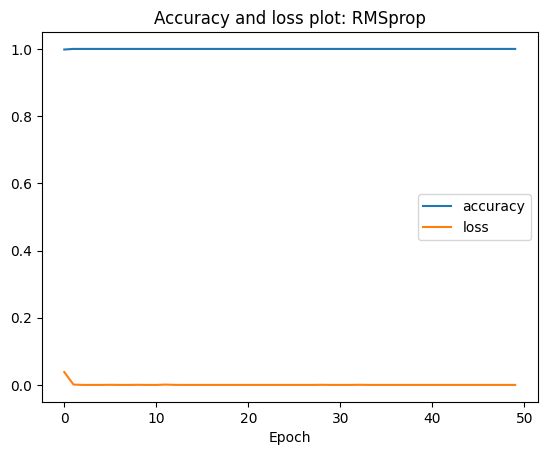

18/18 [==============================] - 1s 33ms/step - loss: 2.3842e-07 - accuracy: 1.0000
Test loss - RMSprop : 0.0000
Test accuracy - RMSprop: 1.0000


In [17]:
CNN(x_train,x_test,y_train,y_test,x_cv,y_cv,'RMSprop')

SGD
Epoch 1/50
115/115 [==============================] - 5s 47ms/step - loss: 0.6425 - accuracy: 0.9286 - val_loss: 0.6931 - val_accuracy: 1.0000
Epoch 2/50
115/115 [==============================] - 5s 45ms/step - loss: 0.5526 - accuracy: 0.9243 - val_loss: 0.6931 - val_accuracy: 1.0000
Epoch 3/50
115/115 [==============================] - 5s 46ms/step - loss: 0.5478 - accuracy: 0.9208 - val_loss: 0.6931 - val_accuracy: 1.0000
Epoch 4/50
115/115 [==============================] - 5s 46ms/step - loss: 0.5339 - accuracy: 0.9487 - val_loss: 0.6931 - val_accuracy: 1.0000
Epoch 5/50
115/115 [==============================] - 5s 46ms/step - loss: 0.5544 - accuracy: 0.9443 - val_loss: 0.6931 - val_accuracy: 1.0000
Epoch 6/50
115/115 [==============================] - 5s 47ms/step - loss: 0.5502 - accuracy: 0.9391 - val_loss: 0.6931 - val_accuracy: 1.0000
Epoch 7/50
115/115 [==============================] - 5s 46ms/step - loss: 0.5538 - accuracy: 0.9469 - val_loss: 0.6931 - val_accuracy: 1.

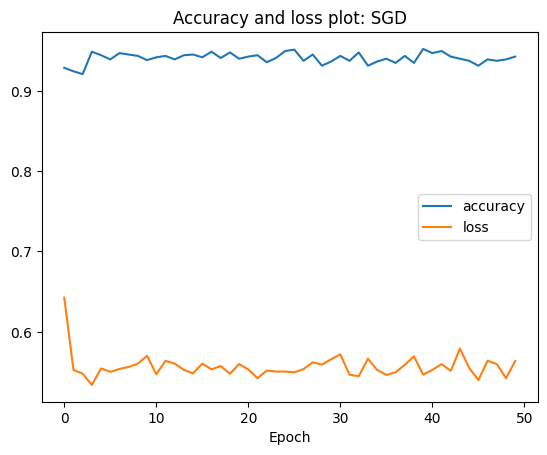

18/18 [==============================] - 1s 32ms/step - loss: 0.6931 - accuracy: 1.0000
Test loss - SGD : 0.6931
Test accuracy - SGD: 1.0000


In [18]:
CNN(x_train,x_test,y_train,y_test,x_cv,y_cv,'SGD')

Adadelta
Epoch 1/50
115/115 [==============================] - 6s 48ms/step - loss: 0.0453 - accuracy: 0.9939 - val_loss: 1.7271e-06 - val_accuracy: 1.0000
Epoch 2/50
115/115 [==============================] - 5s 48ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.4277e-06 - val_accuracy: 1.0000
Epoch 3/50
115/115 [==============================] - 5s 48ms/step - loss: 4.6552e-04 - accuracy: 1.0000 - val_loss: 1.4221e-06 - val_accuracy: 1.0000
Epoch 4/50
115/115 [==============================] - 5s 48ms/step - loss: 1.7396e-04 - accuracy: 1.0000 - val_loss: 1.4512e-06 - val_accuracy: 1.0000
Epoch 5/50
115/115 [==============================] - 6s 48ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.5000e-06 - val_accuracy: 1.0000
Epoch 6/50
115/115 [==============================] - 5s 48ms/step - loss: 2.7409e-04 - accuracy: 1.0000 - val_loss: 1.4437e-06 - val_accuracy: 1.0000
Epoch 7/50
115/115 [==============================] - 6s 48ms/step - loss: 1.5099e-06 - accuracy:

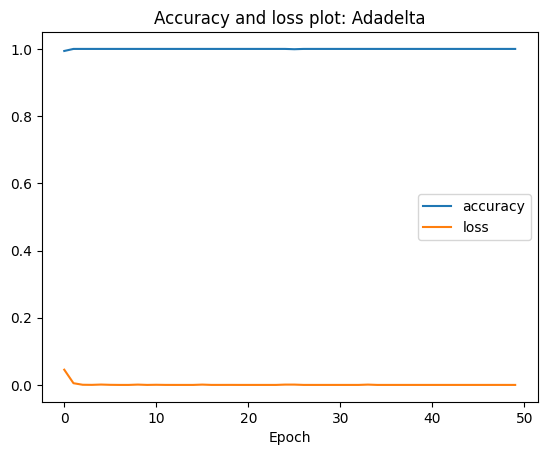

18/18 [==============================] - 1s 32ms/step - loss: 1.0417e-06 - accuracy: 1.0000
Test loss - Adadelta : 0.0000
Test accuracy - Adadelta: 1.0000


In [20]:
CNN(x_train,x_test,y_train,y_test,x_cv,y_cv,'Adadelta')

Adagrad
Epoch 1/50
115/115 [==============================] - 6s 48ms/step - loss: 0.9830 - accuracy: 0.9817 - val_loss: 1.0986 - val_accuracy: 1.0000
Epoch 2/50
115/115 [==============================] - 5s 47ms/step - loss: 0.7891 - accuracy: 0.9939 - val_loss: 1.0986 - val_accuracy: 1.0000
Epoch 3/50
115/115 [==============================] - 5s 47ms/step - loss: 0.6326 - accuracy: 0.9948 - val_loss: 1.0982e-06 - val_accuracy: 1.0000
Epoch 4/50
115/115 [==============================] - 5s 47ms/step - loss: 0.2649 - accuracy: 0.9983 - val_loss: 2.3936e-07 - val_accuracy: 1.0000
Epoch 5/50
115/115 [==============================] - 5s 47ms/step - loss: 0.1788 - accuracy: 0.9991 - val_loss: 2.3936e-07 - val_accuracy: 1.0000
Epoch 6/50
115/115 [==============================] - 5s 47ms/step - loss: 0.1543 - accuracy: 1.0000 - val_loss: 2.4030e-07 - val_accuracy: 1.0000
Epoch 7/50
115/115 [==============================] - 5s 47ms/step - loss: 0.1702 - accuracy: 1.0000 - val_loss: 2.403

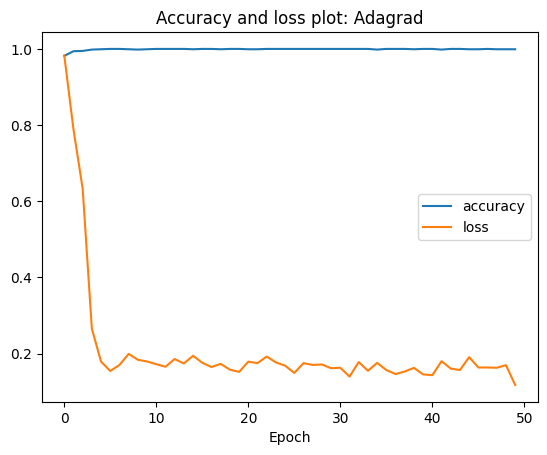

18/18 [==============================] - 1s 32ms/step - loss: 2.3842e-07 - accuracy: 1.0000
Test loss - Adagrad : 0.0000
Test accuracy - Adagrad: 1.0000


In [21]:
CNN(x_train,x_test,y_train,y_test,x_cv,y_cv,'Adagrad')

Adam
Epoch 1/50
115/115 [==============================] - 6s 47ms/step - loss: 0.0852 - accuracy: 0.9904 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 2/50
115/115 [==============================] - 5s 47ms/step - loss: 0.0295 - accuracy: 0.9991 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 3/50
115/115 [==============================] - 5s 46ms/step - loss: 0.0116 - accuracy: 0.9991 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 4/50
115/115 [==============================] - 5s 47ms/step - loss: 0.0018 - accuracy: 0.9991 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 5/50
115/115 [==============================] - 5s 47ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 6/50
115/115 [==============================] - 5s 47ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 7/50
115/115 [==============================] - 5s 47ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 

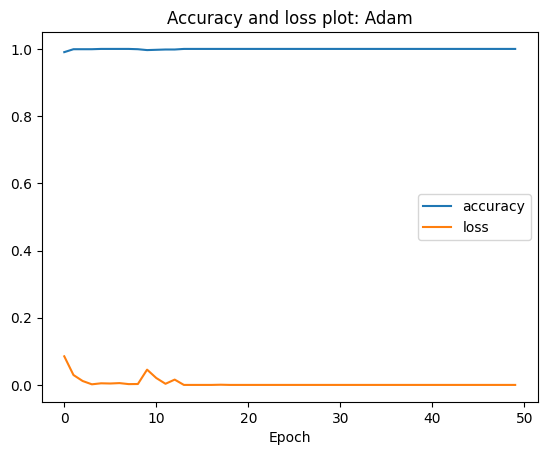

18/18 [==============================] - 1s 32ms/step - loss: 2.3842e-07 - accuracy: 1.0000
Test loss - Adam : 0.0000
Test accuracy - Adam: 1.0000


In [22]:
CNN(x_train,x_test,y_train,y_test,x_cv,y_cv,'Adam')